In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

30.59391639861073 -8.32477114427698
-86.33033412794673 -25.627166638267965
62.444592868108856 75.80099468308211
-50.756470548809276 -96.9524092657097
63.42421687796525 78.78639240917516
15.417172456376619 -102.66967453852477
-51.60329726101907 -170.7827433508528
13.489222253635873 115.33743707064855
44.89149126328434 28.217018647852626
75.3595525408949 -23.812229551585773
-16.3880354611735 -124.03480639098129
-7.52671607864572 131.9983247076524
51.332829817605216 60.62910393805916
-65.78616527614417 164.86203644381413
-56.65959925427564 4.201846921291349
27.297009573683837 133.02916025798766
-46.874861443942024 -36.9260172772525
68.0842443952009 -160.20422190071213
-78.07300511013925 -122.31625177409445
-67.87067975390126 121.8584462356298
-3.4168896989748134 -76.5376895011561
44.688134928926075 110.42204569802317
-54.99535678512923 104.72545632892712
-46.223450342178346 88.73562447162641
-67.1672531732683 -15.521344832291135
83.48187606267197 -76.01200163507504
-80.57686865651928 88.8

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tarudant
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | noyabrsk
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | tarko-sale
Processing Record 6 of Set 1 | ixtapa
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | bacuit
City not found. Skipping...
Processing Record 9 of Set 1 | frecatei
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | tual
Processing Record 13 of Set 1 | svetlyy
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | naze
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | barranca
Processing Record 21 of Set 1 | erenhot
Processing Record 22 of S

Processing Record 38 of Set 4 | shelburne
Processing Record 39 of Set 4 | vestmannaeyjar
Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | abiy adi
City not found. Skipping...
Processing Record 42 of Set 4 | sorvag
City not found. Skipping...
Processing Record 43 of Set 4 | nyurba
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | kuche
City not found. Skipping...
Processing Record 46 of Set 4 | bahia de caraquez
Processing Record 47 of Set 4 | namtsy
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | yuzhno-kurilsk
Processing Record 50 of Set 4 | carbonia
Processing Record 1 of Set 5 | faya
Processing Record 2 of Set 5 | ahipara
Processing Record 3 of Set 5 | henties bay
Processing Record 4 of Set 5 | ola
Processing Record 5 of Set 5 | nuuk
Processing Record 6 of Set 5 | kurilsk
Processing Record 7 of Set 5 | hobyo
Processing Record 8 of Set 5 | lorengau
Processing Record 9 of Se

Processing Record 22 of Set 8 | nogliki
Processing Record 23 of Set 8 | gurgan
City not found. Skipping...
Processing Record 24 of Set 8 | lahat
Processing Record 25 of Set 8 | bosansko grahovo
Processing Record 26 of Set 8 | muravlenko
Processing Record 27 of Set 8 | nago
Processing Record 28 of Set 8 | akdepe
Processing Record 29 of Set 8 | beringovskiy
Processing Record 30 of Set 8 | tapaua
City not found. Skipping...
Processing Record 31 of Set 8 | sola
Processing Record 32 of Set 8 | bambous virieux
Processing Record 33 of Set 8 | la baule-escoublac
Processing Record 34 of Set 8 | san policarpo
Processing Record 35 of Set 8 | ayan
Processing Record 36 of Set 8 | malwan
City not found. Skipping...
Processing Record 37 of Set 8 | sai buri
Processing Record 38 of Set 8 | wick
Processing Record 39 of Set 8 | ostersund
Processing Record 40 of Set 8 | coos bay
Processing Record 41 of Set 8 | ruian
City not found. Skipping...
Processing Record 42 of Set 8 | kargasok
Processing Record 43 

Processing Record 2 of Set 12 | dickinson
Processing Record 3 of Set 12 | shuangyang
Processing Record 4 of Set 12 | skjervoy
Processing Record 5 of Set 12 | palamos
Processing Record 6 of Set 12 | diamantino
Processing Record 7 of Set 12 | ossora
Processing Record 8 of Set 12 | hays
Processing Record 9 of Set 12 | kakching
Processing Record 10 of Set 12 | flin flon
Processing Record 11 of Set 12 | opuwo
Processing Record 12 of Set 12 | khandyga
Processing Record 13 of Set 12 | hami
Processing Record 14 of Set 12 | havelock
Processing Record 15 of Set 12 | ust-karsk
Processing Record 16 of Set 12 | la libertad
Processing Record 17 of Set 12 | zanjan
Processing Record 18 of Set 12 | kalevala
Processing Record 19 of Set 12 | great falls
Processing Record 20 of Set 12 | cozumel
Processing Record 21 of Set 12 | calbuco
Processing Record 22 of Set 12 | lexington
Processing Record 23 of Set 12 | smirnykh
Processing Record 24 of Set 12 | tura
Processing Record 25 of Set 12 | mezen
Processing 

In [20]:
len(city_data)

573

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.26,50,75,10.36,AR,2022-12-18 20:31:45
1,Noyabrsk,63.1994,75.4507,1.33,95,10,10.00,RU,2022-12-18 20:36:00
2,Castro,-24.7911,-50.0119,63.25,86,100,9.35,BR,2022-12-18 20:36:00
3,Tarko-Sale,64.9225,77.7850,-4.04,100,95,2.19,RU,2022-12-18 20:32:07
4,Ixtapa,20.7000,-105.2000,78.03,61,75,4.00,MX,2022-12-18 20:36:01
5,Vaini,-21.2000,-175.2000,82.56,78,20,5.75,TO,2022-12-18 20:36:01
6,Frecatei,45.1000,28.6667,29.88,64,75,14.00,RO,2022-12-18 20:36:02
7,Rikitea,-23.1203,-134.9692,77.31,81,100,14.43,PF,2022-12-18 20:36:02
8,Tual,-5.6667,132.7500,83.05,76,100,14.14,ID,2022-12-18 20:36:03
9,Svetlyy,54.6750,20.1347,21.25,84,16,15.88,RU,2022-12-18 20:36:03


In [23]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-12-18 20:31:45,-54.8000,-68.3000,53.26,50,75,10.36
1,Noyabrsk,RU,2022-12-18 20:36:00,63.1994,75.4507,1.33,95,10,10.00
2,Castro,BR,2022-12-18 20:36:00,-24.7911,-50.0119,63.25,86,100,9.35
3,Tarko-Sale,RU,2022-12-18 20:32:07,64.9225,77.7850,-4.04,100,95,2.19
4,Ixtapa,MX,2022-12-18 20:36:01,20.7000,-105.2000,78.03,61,75,4.00


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

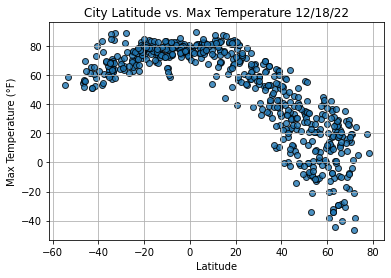

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

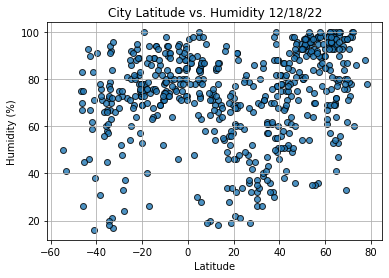

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()